In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('concat_df_with_2_feature.csv')
df

,Form,To,Target,src_Indegree,src_Outdegree
0,4862306,3513873,1,291,7998
1,629760,4763045,1,144,1351
2,3086336,1009858,1,152,2395
3,1090555,4388892,1,50,295
4,307789,4761599,1,161,664
...,...,...,...,...,...
199995,3768869,3632227,0,23,991
199996,193463,395062,0,255,7999
199997,1131409,4535736,0,50,1208
199998,597722,2395573,0,2,6


In [5]:
# Specify the features (X) and target variable (y)
X = df[['Form', 'To','src_Indegree','src_Outdegree',]]
y = df['Target']

In [6]:
X

,Form,To,src_Indegree,src_Outdegree
0,4862306,3513873,291,7998
1,629760,4763045,144,1351
2,3086336,1009858,152,2395
3,1090555,4388892,50,295
4,307789,4761599,161,664
...,...,...,...,...
199995,3768869,3632227,23,991
199996,193463,395062,255,7999
199997,1131409,4535736,50,1208
199998,597722,2395573,2,6


In [8]:
y

0         1
1         1
2         1
3         1
4         1
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: Target, Length: 200000, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160000, 4)
X_test shape: (40000, 4)
y_train shape: (160000,)
y_test shape: (40000,)


Estimators =  10 Train Score 0.802746597794775 test Score 0.8043478260869565
Estimators =  50 Train Score 0.8023943153676717 test Score 0.8040806170689226
Estimators =  100 Train Score 0.8024318757428485 test Score 0.8043386322362366
Estimators =  250 Train Score 0.8024411030999024 test Score 0.8043775649794801
Estimators =  450 Train Score 0.8024241217536306 test Score 0.8043283582089552


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

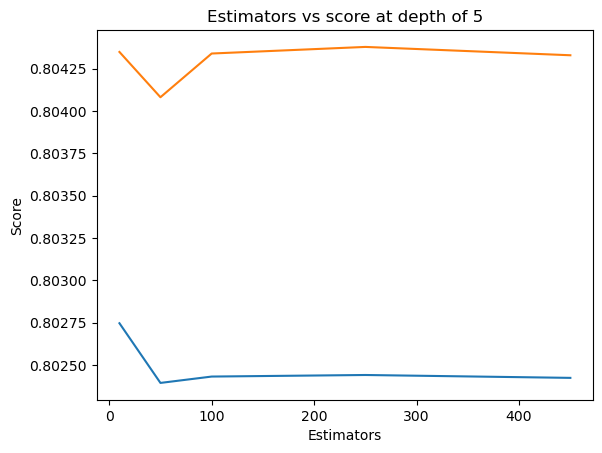

In [11]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train))
    test_sc = f1_score(y_test,clf.predict(X_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8024527058121168 test Score 0.8043559334675916
depth =  9 Train Score 0.8034955154578216 test Score 0.8042807366849178
depth =  11 Train Score 0.805513322200344 test Score 0.803727605711011
depth =  15 Train Score 0.808458362953817 test Score 0.8030431529059616
depth =  20 Train Score 0.8090808706556119 test Score 0.8029626673981896
depth =  35 Train Score 0.8095297477273011 test Score 0.803103250430314
depth =  50 Train Score 0.8095297477273011 test Score 0.803103250430314
depth =  70 Train Score 0.8095297477273011 test Score 0.803103250430314
depth =  130 Train Score 0.8095297477273011 test Score 0.803103250430314


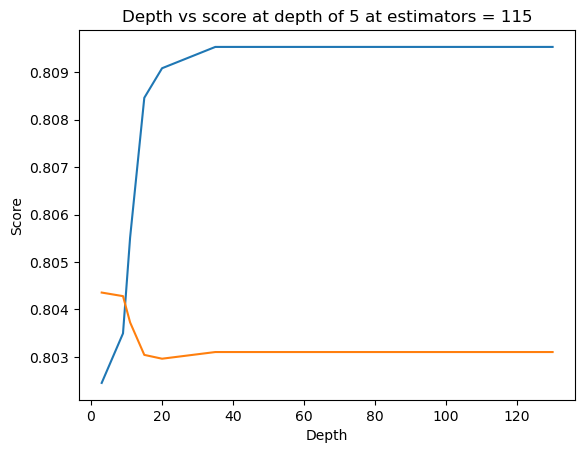

In [12]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train))
    test_sc = f1_score(y_test,clf.predict(X_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [14]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(X_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.8011795  0.80130109 0.80153813 0.8011578  0.80116166]


KeyError: 'mean_train_score'

In [15]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=11, min_samples_leaf=56, min_samples_split=179,
                       n_estimators=106, n_jobs=-1, random_state=25)


In [16]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [17]:
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.8090880757962975
Test f1 score 0.8034392523364485


In [19]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.show()

Train confusion_matrix


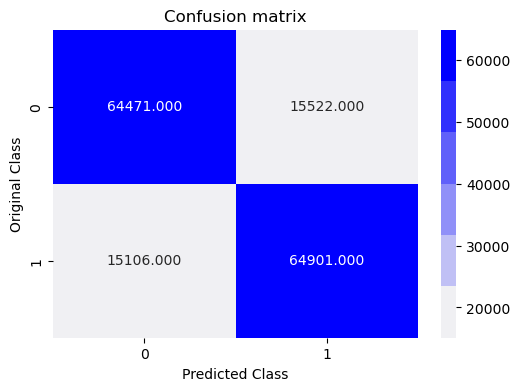

Test confusion_matrix


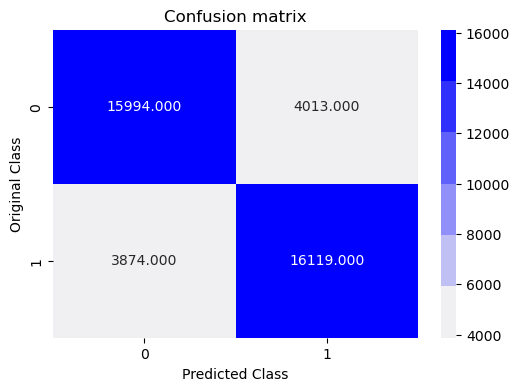

In [20]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

In [21]:
tf = pd.read_csv('test_kaggle_model_1.csv')
tf

,Form,To,src_Indegree,src_Outdegree,In_Degree_dest,OutDegree_dest
0,3360982,4457271,102,1964,0,0
1,4761876,4698439,68,123,0,0
2,4198430,3615486,217,6996,0,0
3,2945770,747948,210,289,0,0
4,3950088,3360335,149,1309,0,0
...,...,...,...,...,...,...
1995,3116985,2415415,105,449,0,0
1996,265459,842701,95,3947,0,0
1997,2547139,4332939,48,131,0,0
1998,2366264,1815056,10,107,0,0


In [23]:
y = tf[['Form','To','src_Indegree','src_Outdegree']]
y

,Form,To,src_Indegree,src_Outdegree
0,3360982,4457271,102,1964
1,4761876,4698439,68,123
2,4198430,3615486,217,6996
3,2945770,747948,210,289
4,3950088,3360335,149,1309
...,...,...,...,...
1995,3116985,2415415,105,449
1996,265459,842701,95,3947
1997,2547139,4332939,48,131
1998,2366264,1815056,10,107


In [24]:
y_test_pred = clf.predict(y)
y_test_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [25]:
arr = np.array(y_test_pred)

In [26]:
zero_count = np.count_nonzero(arr == 0)
print(zero_count)

1372


In [27]:
tf['Predictions'] = arr
tf

,Form,To,src_Indegree,src_Outdegree,In_Degree_dest,OutDegree_dest,Predictions
0,3360982,4457271,102,1964,0,0,1
1,4761876,4698439,68,123,0,0,0
2,4198430,3615486,217,6996,0,0,1
3,2945770,747948,210,289,0,0,0
4,3950088,3360335,149,1309,0,0,1
...,...,...,...,...,...,...,...
1995,3116985,2415415,105,449,0,0,0
1996,265459,842701,95,3947,0,0,1
1997,2547139,4332939,48,131,0,0,0
1998,2366264,1815056,10,107,0,0,0


In [28]:
tf['Id'] = range(1, 2001)

In [29]:
tf

,Form,To,src_Indegree,src_Outdegree,In_Degree_dest,OutDegree_dest,Predictions,Id
0,3360982,4457271,102,1964,0,0,1,1
1,4761876,4698439,68,123,0,0,0,2
2,4198430,3615486,217,6996,0,0,1,3
3,2945770,747948,210,289,0,0,0,4
4,3950088,3360335,149,1309,0,0,1,5
...,...,...,...,...,...,...,...,...
1995,3116985,2415415,105,449,0,0,0,1996
1996,265459,842701,95,3947,0,0,1,1997
1997,2547139,4332939,48,131,0,0,0,1998
1998,2366264,1815056,10,107,0,0,0,1999


In [30]:
X = tf[['Id', 'Predictions']]
X

,Id,Predictions
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
...,...,...
1995,1996,0
1996,1997,1
1997,1998,0
1998,1999,0


In [31]:
csv_file_path = 'up_2.csv'
X.to_csv(csv_file_path, index=False)

In [78]:
from sklearn.tree import DecisionTreeClassifier
clf_new_dt = DecisionTreeClassifier()

In [79]:
clf_new_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
y_pred = clf_new_dt.predict(X_test)

In [81]:
# Evaluate the model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.71185
              precision    recall  f1-score   support

           0       0.71      0.71      0.71     20007
           1       0.71      0.71      0.71     19993

    accuracy                           0.71     40000
   macro avg       0.71      0.71      0.71     40000
weighted avg       0.71      0.71      0.71     40000



In [82]:
y_test_pred_2 = clf_new_dt.predict(y)

In [83]:
y_test_pred_2

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [84]:
arr_1 = np.array(y_test_pred_2)

In [85]:
zero_count = np.count_nonzero(arr_1 == 0)
print(zero_count)

1166


In [86]:
tf

,Form,To,src_Indegree,src_Outdegree,In_Degree_dest,OutDegree_dest,Id,Predictions
0,3360982,4457271,102,1964,0,0,1,0
1,4761876,4698439,68,123,0,0,2,0
2,4198430,3615486,217,6996,0,0,3,1
3,2945770,747948,210,289,0,0,4,0
4,3950088,3360335,149,1309,0,0,5,0
...,...,...,...,...,...,...,...,...
1995,3116985,2415415,105,449,0,0,1996,0
1996,265459,842701,95,3947,0,0,1997,1
1997,2547139,4332939,48,131,0,0,1998,0
1998,2366264,1815056,10,107,0,0,1999,0


In [87]:
column_to_drop = 'Predictions'
tf = tf.drop(columns=column_to_drop)
tf

,Form,To,src_Indegree,src_Outdegree,In_Degree_dest,OutDegree_dest,Id
0,3360982,4457271,102,1964,0,0,1
1,4761876,4698439,68,123,0,0,2
2,4198430,3615486,217,6996,0,0,3
3,2945770,747948,210,289,0,0,4
4,3950088,3360335,149,1309,0,0,5
...,...,...,...,...,...,...,...
1995,3116985,2415415,105,449,0,0,1996
1996,265459,842701,95,3947,0,0,1997
1997,2547139,4332939,48,131,0,0,1998
1998,2366264,1815056,10,107,0,0,1999


In [88]:
tf['Predictions'] = arr_1
tf

,Form,To,src_Indegree,src_Outdegree,In_Degree_dest,OutDegree_dest,Id,Predictions
0,3360982,4457271,102,1964,0,0,1,1
1,4761876,4698439,68,123,0,0,2,0
2,4198430,3615486,217,6996,0,0,3,1
3,2945770,747948,210,289,0,0,4,1
4,3950088,3360335,149,1309,0,0,5,1
...,...,...,...,...,...,...,...,...
1995,3116985,2415415,105,449,0,0,1996,0
1996,265459,842701,95,3947,0,0,1997,1
1997,2547139,4332939,48,131,0,0,1998,0
1998,2366264,1815056,10,107,0,0,1999,0


In [89]:
X = tf[['Id', 'Predictions']]
X

,Id,Predictions
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,0
1996,1997,1
1997,1998,0
1998,1999,0


In [90]:
csv_file_path = 'up_3_DT.csv'
X.to_csv(csv_file_path, index=False)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
# Create a logistic regression model
clf_3 = LogisticRegression()

# Train the model on the training data
clf_3.fit(X_train, y_train)

LogisticRegression()

In [93]:
y_pred = clf_3.predict(X_test)

In [94]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.773125
              precision    recall  f1-score   support

           0       0.73      0.88      0.79     20007
           1       0.85      0.67      0.75     19993

    accuracy                           0.77     40000
   macro avg       0.79      0.77      0.77     40000
weighted avg       0.79      0.77      0.77     40000



In [95]:
y_test_pred_3 = clf_3.predict(y)

In [96]:
arr_3 = np.array(y_test_pred_3)
zero_count = np.count_nonzero(arr_3 == 0)
print(zero_count)

1636


In [97]:
tf

,Form,To,src_Indegree,src_Outdegree,In_Degree_dest,OutDegree_dest,Id,Predictions
0,3360982,4457271,102,1964,0,0,1,1
1,4761876,4698439,68,123,0,0,2,0
2,4198430,3615486,217,6996,0,0,3,1
3,2945770,747948,210,289,0,0,4,1
4,3950088,3360335,149,1309,0,0,5,1
...,...,...,...,...,...,...,...,...
1995,3116985,2415415,105,449,0,0,1996,0
1996,265459,842701,95,3947,0,0,1997,1
1997,2547139,4332939,48,131,0,0,1998,0
1998,2366264,1815056,10,107,0,0,1999,0


In [98]:
column_to_drop = 'Predictions'
tf = tf.drop(columns=column_to_drop)
tf

,Form,To,src_Indegree,src_Outdegree,In_Degree_dest,OutDegree_dest,Id
0,3360982,4457271,102,1964,0,0,1
1,4761876,4698439,68,123,0,0,2
2,4198430,3615486,217,6996,0,0,3
3,2945770,747948,210,289,0,0,4
4,3950088,3360335,149,1309,0,0,5
...,...,...,...,...,...,...,...
1995,3116985,2415415,105,449,0,0,1996
1996,265459,842701,95,3947,0,0,1997
1997,2547139,4332939,48,131,0,0,1998
1998,2366264,1815056,10,107,0,0,1999


In [99]:
tf['Predictions'] = arr_3
tf

,Form,To,src_Indegree,src_Outdegree,In_Degree_dest,OutDegree_dest,Id,Predictions
0,3360982,4457271,102,1964,0,0,1,0
1,4761876,4698439,68,123,0,0,2,0
2,4198430,3615486,217,6996,0,0,3,1
3,2945770,747948,210,289,0,0,4,0
4,3950088,3360335,149,1309,0,0,5,0
...,...,...,...,...,...,...,...,...
1995,3116985,2415415,105,449,0,0,1996,0
1996,265459,842701,95,3947,0,0,1997,1
1997,2547139,4332939,48,131,0,0,1998,0
1998,2366264,1815056,10,107,0,0,1999,0


In [100]:
X = tf[['Id', 'Predictions']]
X

,Id,Predictions
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
1995,1996,0
1996,1997,1
1997,1998,0
1998,1999,0


In [101]:
csv_file_path = 'up_4_LR.csv'
X.to_csv(csv_file_path, index=False)